# LIBRARIES

In [14]:
import pickle
from Environment import *
from UserCat import UserCat
from Product import Product
from Greedy_optimizer import *
import numpy as np
import matplotlib.pyplot as plt
from step3_ucb1 import *
from step4_ucb1 import *
from step5_ucb1 import *
from Step3_TS import *
from Step4_TS import *
from Step5_TS import *
from Step6_TS_sw import *
from Step7_TS import *

# ENVIRONMENT DEFINITION 

- Environment fixed informations and Products definition

In [15]:
np.random.seed(1)

products=[]

nameofproduct= [ #name of products
    "Calabazas",
    "Hinojo",
    "Sesamo",
    "Girasol",
    "Amapola"
]
# Dictionary fixing the secondary products linked to 
secondary_dict= {        
    "Calabazas": [1,2],
    "Hinojo": [0,2],
    "Sesamo": [1,3],
    "Girasol": [2,4],
    "Amapola": [2,3]
}

# Matrix n_prod*n_prices collecting the possible prices for each product. Prices are in ascending order
prices = [[8., 9, 10, 11],
          [10., 11, 12, 13],
          [20., 21, 23, 25],
          [28., 30, 31, 33],
          [40., 42, 43, 45]]
# Production cost of the products
cost = [5, 7.8, 18.1, 23.5, 32]

#sarebbe interessante anche prendere da file il tutto così da cambiare tutto più facilmente
#calcolo i margini dai cost mi sembra più sensato e anche più veloce se dobbiamo cambiare continuamente
# Computation of margins linked to each product for a particular choice of price
cost2 = np.tile(np.array([cost]).transpose(), (1, 4))
margins = np.array(prices)-cost2
# Creation of the 5 objects of Product class
for i in range (5):
    products.append(Product(prices[i], i, nameofproduct[i],margins[i]))

# Parameter for the computation of the click probability on the SECOND secondary product
lambda_q = 0.7

- User Category 1: Young and Inexpert

In [16]:
# Parameters for the distribution describing the reservation price
res_price_params_1 = {
    "mean": [9, 15, 22, 33, 35],
    "std": [1, 2, 1, 1.5, 1.5]
}
# Matrix collecting the graph_weights describing mechanism of click on secondary products
probabilities_1 = [[0, 0.7, 0.3, 0, 0],
                 [0.6, 0, 0.5, 0, 0],
                 [0, 0.7, 0, 0.3, 0],
                 [0, 0, 0.4, 0, 0.1],
                 [0, 0, 0.3, 0.5, 0]]
prob_lambda_1 = lambda_correct(np.matrix(probabilities_1), secondary_dict, lambda_q)
# Parameter of the Dirichlet for the alphas ratio sampling
alphas_1 = [15, 15, 10, 5, 5]
# Parameter of the Poisson distribution determining the number of product bought
# ! we considered a trasleted Poisson in 1, to avoid the case of 0 items bought, so
#   the mean is poisson_lambda+1
poisson_lambda_1 = [2, 1, .5, .2, .1]

user1 = UserCat(alphas_1, res_price_params_1, poisson_lambda_1, prob_lambda_1, 'Young and Not Expert')

- User Category 2: Old and Inexpert

In [17]:
# Parameters for the distribution describing the reservation price
res_price_params_2 = {
    "mean": [9, 16, 25, 41, 47],
    "std": [1, 2.5, 1.5, 3, 2]
}
# Matrix collecting the graph_weights describing mechanism of click on secondary products
probabilities_2 = [[0, 0.5, 0.4, 0, 0],
                 [0.4, 0, 0.6, 0, 0],
                 [0, 0.7, 0, 0.5, 0],
                 [0, 0, 0.5, 0, 0.3],
                 [0, 0, 0.5, 0.3, 0]]
prob_lambda_2 = lambda_correct(np.matrix(probabilities_2), secondary_dict, lambda_q)
# Parameter of the Dirichlet for the alphas ratio sampling
alphas_2 = [7, 12, 12, 12, 7]
# Parameter of the Poisson distribution determining the number of product bought
# ! we considered a trasleted Poisson in 1, to avoid the case of 0 items bought, so
#   the mean is poisson_lambda+1
poisson_lambda_2 = [0.5, 1, 2, 1, 0.5]

user2 = UserCat(alphas_2, res_price_params_2, poisson_lambda_2, prob_lambda_2, 'Old and Not Expert')

- User Category 3: Expert

In [18]:
# Parameters for the distribution describing the reservation price
res_price_params_3 = {
    "mean": [8, 13, 24, 39, 50],
    "std": [1, 1.5, 2, 2, 1.5]
}
# Matrix collecting the graph_weights describing mechanism of click on secondary products
probabilities_3 = [[0.4, 0, 0.6, 0, 0],
                 [0.4, 0, 0.3, 0, 0],
                 [0, 0.4, 0, 0.6, 0],
                 [0, 0, 0.3, 0, 0.7],
                 [0, 0, 0.4, 0.6, 0]]
prob_lambda_3 = lambda_correct(np.matrix(probabilities_3), secondary_dict, lambda_q)
# Parameter of the Dirichlet for the alphas ratio sampling
alphas_3 = [5, 5, 10, 15, 15]
# Parameter of the Poisson distribution determining the number of product bought
# ! we considered a trasleted Poisson in 1, to avoid the case of 0 items bought, so
#   the mean is poisson_lambda+1
poisson_lambda_3 = [0.1, 0.2, 0.5, 1.5, 1.5]

user3 = UserCat(alphas_3, res_price_params_3, poisson_lambda_3, prob_lambda_3, 'Expert')

- User Category 0: Aggregated demand

In [19]:
# Parameters for the distribution describing the reservation price
res_price_params_0 = {
    "mean": [9.7, 12.7, 24.5, 31.6, 41.1],
    "std": [1.5, 2, 4, 2.5, 3]
}

# Matrix collecting the graph_weights describing mechanism of click on secondary products
probabilities_0 = [[0, 0.6, 0.2, 0, 0],
                 [0.5, 0, 0.4, 0, 0],
                 [0, 0.5, 0, 0.5, 0],
                 [0, 0, 0.6, 0, 0.5],
                 [0, 0, 0.3, 0.5, 0]]
prob_lambda_0 = lambda_correct(np.matrix(probabilities_0), secondary_dict, lambda_q)
# Parameter of the Dirichlet for the alphas ratio sampling
alphas_0 = [10, 10, 10, 10, 10]
# Parameter of the Poisson distribution determining the number of product bought
# ! we considered a trasleted Poisson in 1, to avoid the case of 0 items bought, so
#   the mean is poisson_lambda+1
poisson_lambda_0 = [1.5, 1, .5, .5, .2]

user0 = UserCat(alphas_0, res_price_params_0, poisson_lambda_0, prob_lambda_0)

- Environment creation

In [20]:
# COMMON
# probability distribution of the features
# the following list has to be interpreted in the following way:
# values_i is the parameter of the bernoulli for feature i; in our case feature0 is 1(0) for Old(Young)
# while feature1 is 1(0) for Expert(Not Expert)
feature_prob = [0.3, 0.4]
# CASE WITH 3 USERS :
# list of users 
users3 = [user1, user2, user3]
feature_matrix3 = np.array([[0, 1], [2, 2]]) # values represent the label of the User Category
env3 = Environment(users3, products, secondary_dict, feature_matrix3, feature_prob)

# CASE WITH AGGREGATED USER :
users0 = [user0]
feature_matrix0 = np.array([[0, 0], [0, 0]])
env = Environment(users0, products, secondary_dict, feature_matrix0, feature_prob)

## Environment's Functions  Test

In [8]:
opt_rewards_array, opt_comb_list = env3.optimal_reward(Disaggregated=True)
aggr_opt_reward, aggr_opt_comb = env3.optimal_reward()
dis_opt_reward = np.sum(np.array(env3.user_cat_prob)*opt_rewards_array)
print('Aggregated Optimal Reward : %.3f VS Disaggregated Optimal Reward : %.3f' %(aggr_opt_reward, dis_opt_reward))
print('Aggregated Optimal Price combination : %s' %aggr_opt_comb)
print('Optimal price combinations with users divided by category:')
for i, user in enumerate(env3.users):
    print('User\'s Category : %s - %s' %(user.category, str(opt_comb_list[i])))

Aggregated Optimal Reward : 19.876 VS Disaggregated Optimal Reward : 21.003
Aggregated Optimal Price combination : [0, 3, 1, 3, 3]
Optimal price combinations with users divided by category:
User's Category : Young and Not Expert - [0, 3, 0, 2, 0]
User's Category : Old and Not Expert - [0, 3, 2, 3, 2]
User's Category : Expert - [0, 1, 1, 3, 3]


In [9]:
# FUNZIONAMENTO EXPECTED REWARD PER STEP 7 
unique_partition = env3.expected_reward(price_combination=[2,3,2,1,0], group_list=[[0,0],[1,1],[0,1],[1,0]])
base_case = env3.expected_reward(price_combination=[2,3,2,1,0])
print('Unique Partition : %.6f  is equal to base case : %.6f' %(unique_partition, base_case))

Unique Partition : 13.627316  is equal to base case : 13.627316


In [10]:
np.matrix(env.theoretical_values['conversion_rates'][0])

matrix([[0.87146285, 0.67963081, 0.42074029, 0.19306234],
        [0.91149201, 0.80233746, 0.63683065, 0.44038231],
        [0.86970548, 0.80921305, 0.64616977, 0.45026178],
        [0.9250663 , 0.7389137 , 0.59483487, 0.28773972],
        [0.64306616, 0.38208858, 0.263258  , 0.09680048]])

In [83]:
np.random.seed(0)
d = env3.simulate_day_context(2000, [[0,0,0,0,0], [0,0,0,0,0], [0,0,0,0,0]], np.array([[0,1],[2,2]]), 
["conversion_rates", "alpha_ratios", "products_sold"])
d['01']

{'n_users': 407,
 'CR_data': array([[126., 264., 251., 160.,  71.],
        [149., 266., 251., 160.,  71.]]),
 'initial_prod': array([ 61., 114., 101.,  88.,  43.]),
 'n_prod_sold': array([[180., 518., 789., 307., 105.],
        [126., 264., 251., 160.,  71.]]),
 'CR_vector': array([0.84563758, 0.9924812 , 1.        , 0.99999999, 0.99999999]),
 'alpha_ratios': array([0.14987715, 0.28009828, 0.24815725, 0.21621622, 0.10565111]),
 'mean_prod_sold': array([1.42857142, 1.9621212 , 3.14342628, 1.91874999, 1.47887322])}

In [78]:
np.random.seed(0)
a = env.simulate_day(2000, [0,0,0,0,0], ["conversion_rates", "alpha_ratios", "products_sold", "graph_weights"])
a

{'CR_data': array([[ 734.,  877.,  869.,  508.,  262.],
        [ 853.,  975., 1005.,  542.,  434.]]),
 'initial_prod': array([567., 366., 553., 224., 294.]),
 'n_prod_sold': array([[1780., 1714., 1271.,  765.,  325.],
        [ 734.,  877.,  869.,  508.,  262.]]),
 'clicks': array([[  0., 277.,  86.,   0.,   0.],
        [286.,   0., 159.,   0.,   0.],
        [  0., 332.,   0., 262.,   0.],
        [  0.,   0., 152.,   0., 140.],
        [  0.,   0.,  55.,  56.,   0.]]),
 'visualizations': array([[  0., 484., 554.,   0.,   0.],
        [616.,   0., 558.,   0.,   0.],
        [  0., 685.,   0., 732.,   0.],
        [  0.,   0., 249.,   0., 446.],
        [  0.,   0., 195., 167.,   0.]]),
 'CR_vector': array([0.86049238, 0.89948718, 0.86467662, 0.93726937, 0.60368663]),
 'alpha_ratios': array([0.28293413, 0.18263473, 0.2759481 , 0.11177645, 0.14670659]),
 'mean_prod_sold': array([2.42506812, 1.95438996, 1.46260069, 1.50590551, 1.24045801]),
 'graph_weights': array([[0.        , 0.57231

- Reservation Price Distribution Plot for one user

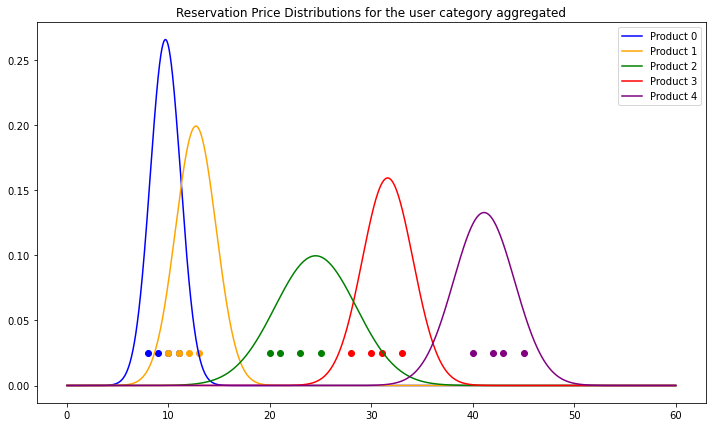

In [13]:
user_index = 0
x = np.arange(0, 60 , .01)
plt.figure(figsize=(12,7))

color_list = ['blue', 'orange', 'green', 'red', 'purple']

for i in range(5):
    res_price_distr = env.users[user_index].res_price_distr[i]
    y = res_price_distr.pdf(x)
    plt.plot(x, y, label = 'Product %d' %i, color = color_list[i])

for i in range(5):
    for j in range(4):
        plt.scatter(prices[i][j], 0.025, color = color_list[i])

plt.title("Reservation Price Distributions for the user category %s" %env.users[user_index].category)
plt.legend()
plt.show()

* Number of Prouducts Sold Distributions Plot for a User

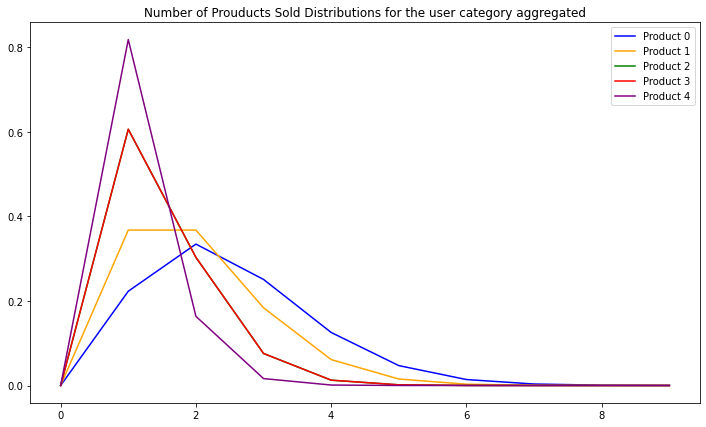

In [14]:
user_index = 0
x = np.arange(0, 10, 1)
plt.figure(figsize=(12,7))

color_list = ['blue', 'orange', 'green', 'red', 'purple']

for i in range(5):
    pois_l = env.users[user_index].poisson_lambda[i]
    distr = scipy.stats.poisson(pois_l)
    y = distr.pmf(x[:-1])
    y = np.insert(y, 0, 0)
    plt.plot(x, y, label = 'Product %d' %i, color = color_list[i])
    #plt.scatter(x, y, color = color_list[i], label = 'Product %d' %i)
    #plt.vlines(x, 0, y, color = color_list[i], lw=5, alpha=0.5)

plt.title("Number of Prouducts Sold Distributions for the user category %s" %env.users[user_index].category)
plt.legend()
plt.show()

# Greedy Algorithm Example

In [21]:
greedy_optimizer = Greedy_optimizer(env)
greedy_optimizer.run()

{'expected_reward': 10.325578532573228, 'combination': [0, 1, 2, 1, 0]}

In [23]:
env.optimal_reward()

(10.325578532573228, [0, 1, 2, 1, 0])

In [10]:
greedy_3 = Greedy_optimizer(env3)
greedy_3.run()

{'expected_reward': 21.161450869660527, 'combination': [0, 3, 1, 3, 3]}

In [11]:
rew0, comb0 = greedy_3.run(group_list=[[0,0]]).values()
rew1, comb1 = greedy_3.run(group_list=[[0,1]]).values()
rew2, comb2 = greedy_3.run(group_list=[[1,0], [1,1]]).values()
print('Optimal Expected Rewards : [%f, %f, %f]\nOptimale Combinations [%s, %s, %s]' %(rew0,rew1,rew2,comb0,comb1,comb2))
print('Total Expected Reward : %f' %(np.sum(np.array((rew0,rew1,rew2))*env3.user_cat_prob)))

Optimal Expected Rewards : [12.421922, 25.915860, 32.519183]
Optimale Combinations [[0, 3, 0, 2, 0], [0, 3, 2, 3, 2], [0, 1, 1, 3, 3]]
Total Expected Reward : 22.229403


In [15]:
CR = [env3.theoretical_values['conversion_rates'][2]]*2
alpha = [env3.theoretical_values['alpha_ratios'][2]]*2
n_prod = [env3.theoretical_values['n_prod_sold'][2]]*2
greedy_3.run(conversion_rates=CR, alphas_ratio=alpha, n_prod=n_prod, group_list=[[1,1],[1,0]])

{'expected_reward': 32.519182769015046, 'combination': [0, 1, 1, 3, 3]}

In [12]:
env3.optimal_reward(Disaggregated=True)

(array([12.42192166, 25.9158599 , 32.51918277]),
 [[0, 3, 0, 2, 0], [0, 3, 2, 3, 2], [0, 1, 1, 3, 3]])

In [24]:
rewards, cominations = env3.optimal_reward(Disaggregated=True)
np.sum(rewards*env3.user_cat_prob)

10.325578532573227

# STEP 3 : Uncertain Convertion Rates

## - TS

In [22]:
# Initial assumptions for beta parameters (uniform distr. on [0, 1])
a = np.ones((5,4))*40
b = np.ones((5,4))
initial_beta_CR = np.array([a, b])
learner_TS3 = Step3_TS(env, initial_beta_CR, learning_rate = 1.0)

In [23]:
# set the parameter for the algorithm execution
n_runs = 10
daily_users = 200
n_days = 300

# delete possible old informations form past runs 
learner_TS3.reward_history = []
learner_TS3.price_comb_history = []
learner_TS3.cr_matrix_list = []

# execute the algorithm n_runs times
for i in range(n_runs) :
    learner_TS3.run(n_days, daily_users)

# collect all informations for the plot
opt_reward_TS3 = learner_TS3.opt_reward
collected_rewards_TS3 = learner_TS3.reward_history

- ### Salvo la history su file in modo che siamo sicuri ti riuscire a recuperarla anche in un secondo momento

In [10]:
with open('step3_TS_rewards', 'wb') as f: 
    pickle.dump(collected_rewards_TS3, f)

- ### Per recuperare, invece, i risultati ottenuti in un secondo momento :

In [ ]:
with open('step3_TS_rewards', 'rb') as f: 
    collected_rewards_TS3 = pickle.load(f)

- ### Cumulative Regret Plot

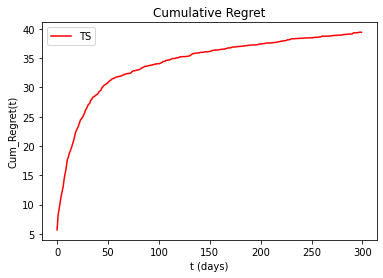

In [24]:
plt.figure(0)
plt.xlabel("t (days)")
plt.ylabel("Cum_Regret(t)")
plt.title("Cumulative Regret")
plt.plot(np.cumsum(np.mean(opt_reward_TS3 - collected_rewards_TS3, axis=0)), 'r')  #'r' stay for red, the color for the TS algorithm
plt.legend(["TS"])
plt.show()

- ### Standard Deviation Plot

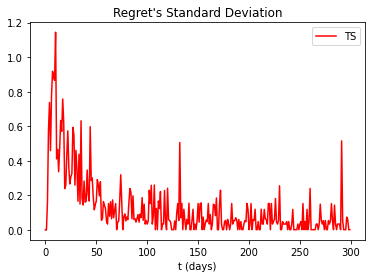

In [25]:
plt.figure(0)
plt.xlabel("t (days)")
plt.title("Regret's Standard Deviation")
plt.plot(np.std(opt_reward_TS3 - collected_rewards_TS3, axis=0), 'r')  #'r' stay for red, the color for the TS algorithm
#plt.plot(np.std(opt - gr_rewards_per_experiment, axis=0), 'g')  #'g' stay for green, the color for the Greedy algorithm
plt.legend(["TS"])
plt.show()

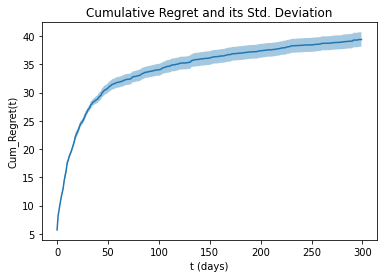

In [26]:
# mean_R = np.mean(R, axis=0)
cum_R_TS3 = np.cumsum(opt_reward_TS3 - collected_rewards_TS3, axis = 1)
mean_cum_R_TS3 = np.mean(cum_R_TS3, axis = 0)
std_dev_TS3 = np.std(cum_R_TS3, axis=0)/np.sqrt(n_runs)
plt.plot(mean_cum_R_TS3)
plt.fill_between(range(n_days), mean_cum_R_TS3-std_dev_TS3, mean_cum_R_TS3+std_dev_TS3, alpha=0.4)
plt.title("Cumulative Regret and its Std. Deviation")
plt.xlabel("t (days)")
plt.ylabel("Cum_Regret(t)")
plt.show()

- ### Comparison between Optimal and Expected Reward

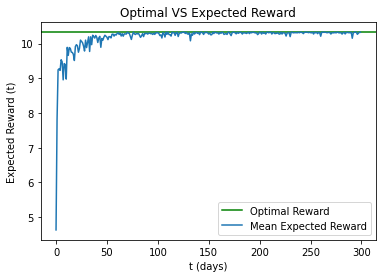

In [27]:
plt.figure(0)
plt.title("Optimal VS Expected Reward")
plt.axhline(opt_reward_TS3, color = 'green')
plt.plot(np.mean(collected_rewards_TS3, axis=0))
plt.xlabel("t (days)")
plt.ylabel("Expected Reward (t)")
plt.legend(["Optimal Reward", "Mean Expected Reward"])
plt.show()

- ### Estimation of Uncertain Parameters

In [77]:
mean_CR_TS3 = np.mean(learner_TS3.cr_matrix_list, axis = 0)

print('Conversion Rates:\n%s' %str(mean_CR_TS3))

Conversion Rates:
[[0.84226181 0.65594201 0.59619763 0.56000434]
 [0.99009901 0.99009901 0.96746322 0.8848782 ]
 [0.99009901 0.99009901 0.90914681 0.64746355]
 [0.99009901 0.99009901 0.99009901 0.99617068]
 [0.99009901 0.9901135  0.97782767 0.85616619]]


In [78]:
print('THEORETICAL VALUES:\n\nConversion Rates :\n%s' %np.matrix(env.theoretical_values['conversion_rates'][0]))

THEORETICAL VALUES:

Conversion Rates :
[[0.84134475 0.5        0.15865525 0.02275013]
 [0.99180246 0.97724987 0.94520071 0.88493033]
 [0.99957094 0.99616962 0.90878878 0.5       ]
 [0.99999266 0.99987713 0.99957094 0.99616962]
 [0.99976737 0.99379033 0.97724987 0.84134475]]


## - UCB1

In [19]:
# setting the run parameters
n_runs = 3
daily_users = 200
n_days = 300

In [90]:
opt_reward = env.optimal_reward()[0]
ucb3 = step3_ucb1(len(prices), len(prices[0]), prices, env)
for _ in range(n_runs):
    ucb3.run(n_days, daily_users)

In [91]:
# store the result
with open("ucb3", 'wb') as f1:
    pickle.dump(ucb3, f1)

In [17]:
# load the result
with open("ucb3", 'rb') as f1:
    ucb3 = pickle.load(f1)

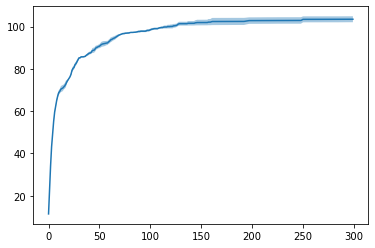

In [20]:
step3_ucb1_collected_rewards = ucb3.collected_rewards
step3_ucb1_R = ucb3.regret
# plot of the result
mean_step3_ucb1_R = np.mean(step3_ucb1_R, axis=0)
std_dev_step3_ucb1 = np.std(step3_ucb1_R, axis=0)/np.sqrt(n_runs)
plt.plot(mean_step3_ucb1_R)
plt.fill_between(range(n_days), mean_step3_ucb1_R-std_dev_step3_ucb1, mean_step3_ucb1_R+std_dev_step3_ucb1, alpha=0.4)

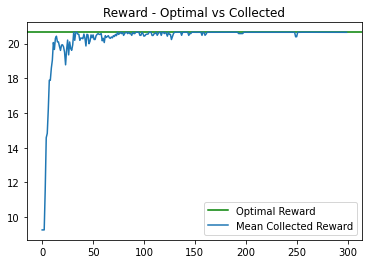

In [23]:
# comparison between optimal and expected reward
plt.figure(0)
plt.title("Reward - Optimal vs Collected")
plt.axhline(opt_reward, color = 'green')
plt.plot(np.mean(step3_ucb1_collected_rewards, axis=0))
plt.legend(["Optimal Reward", "Mean Collected Reward"])
plt.show()

In [24]:
# last n pulled arms
print("Last n pulled arms:")
np.array(ucb3.pulled[-10:-1], dtype=np.int32)[:, 0].tolist()

Last n pulled arms:


[[0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 0, 0],
 [0, 1, 2, 0, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0]]

In [25]:
# ucb1 most pulled arms
combinations_data = [[] for i in range(1024)]
for i1 in range(4):
    for i2 in range(4):
        for i3 in range(4):
            for i4 in range(4):
                for i5 in range(4):
                    combinations_data[i1*(4**4) + i2*(4**3) + i3*(4**2) + i4*(4**1) + i5*(4**0)].append([i1, i2, i3, i4, i5])
                    c = np.array(np.array(ucb3.pulled, dtype=np.int32)[:, 0].tolist()) == [i1, i2, i3, i4, i5]
                    c = np.prod(c, axis=1)
                    combinations_data[i1*(4**4) + i2*(4**3) + i3*(4**2) + i4*(4**1) + i5*(4**0)].append(np.count_nonzero(c))
                    combinations_data[i1*(4**4) + i2*(4**3) + i3*(4**2) + i4*(4**1) + i5*(4**0)].append(env.expected_reward([i1, i2, i3, i4, i5]))
                    x = combinations_data
result = []
for i in range(20):
    result.append(x[np.argmax(np.array(x)[:, 1])])
    x = np.delete(x, np.argmax(np.array(x)[:, 1]), axis=0).tolist()
print("Optimal arms combination:")
print(env.optimal_reward()[1], env.optimal_reward()[0])
print("\n\nUcb1 most pulled arms:")
print("(arms combination), (n° pulls), (exp rew)")
result

C:\Users\stefa\AppData\Local\Temp/ipykernel_20672/635266706.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result.append(x[np.argmax(np.array(x)[:, 1])])
C:\Users\stefa\AppData\Local\Temp/ipykernel_20672/635266706.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.delete(x, np.argmax(np.array(x)[:, 1]), axis=0).tolist()
C:\Users\stefa\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different 

Optimal arms combination:
[0, 1, 2, 1, 0] 20.651157065146457


Ucb1 most pulled arms:
(arms combination), (n° pulls), (exp rew)


[[[0, 1, 2, 1, 0], 152, 20.651157065146457],
 [[0, 1, 2, 0, 0], 89, 20.645580219306414],
 [[1, 1, 2, 1, 0], 8, 20.423557603243626],
 [[0, 2, 2, 0, 0], 6, 20.285754860939285],
 [[0, 1, 1, 1, 0], 5, 20.328276656643165],
 [[0, 2, 1, 1, 0], 5, 19.973977869290117],
 [[1, 1, 2, 0, 0], 4, 20.422663368535716],
 [[0, 2, 2, 1, 0], 3, 20.29324032804404],
 [[3, 3, 3, 3, 3], 3, 9.268398595840193],
 [[0, 1, 1, 2, 0], 2, 19.53003262808147],
 [[0, 1, 3, 0, 0], 2, 19.630042194936703],
 [[0, 1, 3, 1, 0], 2, 19.655233906430162],
 [[1, 1, 1, 0, 0], 2, 20.067871467732616],
 [[1, 1, 1, 1, 0], 2, 20.121290049315945],
 [[1, 1, 3, 1, 0], 2, 19.438482687494467],
 [[1, 2, 2, 1, 1], 2, 18.582827137551018],
 [[1, 2, 2, 2, 1], 2, 17.885075308042584],
 [[2, 2, 3, 2, 2], 2, 14.890239708456626],
 [[0, 1, 1, 1, 1], 1, 18.849236165707318],
 [[0, 2, 1, 1, 2], 1, 17.6246428973127]]

In [26]:
ucb3.print_estimations()

Conversion rates estimation (means + widths, over n experiments):
 [[0.88431761 0.71092856 0.51760216 0.30925966]
 [       inf 0.81257784 0.67466634 0.51047618]
 [       inf 0.85183325 0.65755104 0.50570398]
 [0.94484594 0.75425588 0.65534662 0.3810547 ]
 [0.65374269 0.47217318 0.38255573 0.26132221]]


# STEP 4 : Uncertain conversion rates, alpha ratio and number of products sold

## - TS

In [28]:
# Initial assumptions for beta parameters (uniform distr. on [0, 1])
a = np.ones((5,4))*20
b = np.ones((5,4))
initial_beta_CR = np.array([a, b])
initial_beta_alpha = np.ones((2,5))
initial_n_prod_data = np.ones((2,5))
learner_TS4 = Step4_TS(env, initial_beta_CR, initial_beta_alpha, initial_n_prod_data, learning_rate=1.0)

In [29]:
# set the parameter for the algorithm execution
n_runs = 10
daily_users = 200
n_days = 300

# delete possible old informations form past runs 
learner_TS4.reward_history = []
learner_TS4.price_comb_history = []
learner_TS4.cr_matrix_list = []
learner_TS4.alpha_ratios_list = []
learner_TS4.n_prod_list = []

# execute the algorithm n_runs times
for i in range(n_runs) :
    learner_TS4.run(n_days, daily_users)

# collect all informations for the plot
opt_reward_TS4 = learner_TS4.opt_reward
collected_rewards_TS4 = learner_TS4.reward_history

- ### Salvo la history su file in modo che siamo sicuri ti riuscire a recuperarla anche in un secondo momento

In [29]:
with open('step4_TS_rewards', 'wb') as f: 
    pickle.dump(collected_rewards_TS4, f)

- ### Per recuperare, invece, i risultati ottenuti in un secondo momento :

In [ ]:
with open('step4_TS_rewards', 'rb') as f: 
    collected_rewards_TS4 = pickle.load(f)

- ### Cumulative Regret Plot

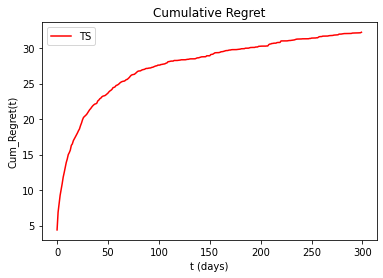

In [30]:
plt.figure(0)
plt.xlabel("t (days)")
plt.ylabel("Cum_Regret(t)")
plt.title("Cumulative Regret")
plt.plot(np.cumsum(np.mean(opt_reward_TS4 - collected_rewards_TS4, axis=0)), 'r')  #'r' stay for red, the color for the TS algorithm
plt.legend(["TS"])
plt.show()

- ### Standard Deviation Plot

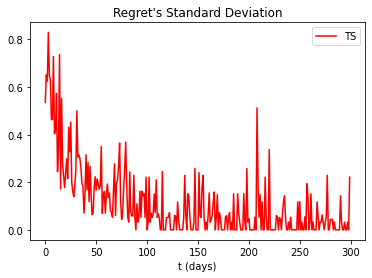

In [31]:
plt.figure(0)
plt.xlabel("t (days)")
plt.title("Regret's Standard Deviation")
plt.plot(np.std(opt_reward_TS4 - collected_rewards_TS4, axis=0), 'r')  #'r' stay for red, the color for the TS algorithm
#plt.plot(np.std(opt - gr_rewards_per_experiment, axis=0), 'g')  #'g' stay for green, the color for the Greedy algorithm
plt.legend(["TS"])
plt.show()

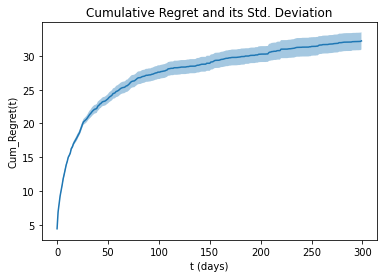

In [32]:
# mean_R = np.mean(R, axis=0)
cum_R_TS4 = np.cumsum(opt_reward_TS4 - collected_rewards_TS4, axis = 1)
mean_cum_R_TS4 = np.mean(cum_R_TS4, axis = 0)
std_dev_TS4 = np.std(cum_R_TS4, axis=0)/np.sqrt(n_runs)
plt.plot(mean_cum_R_TS4)
plt.fill_between(range(n_days), mean_cum_R_TS4-std_dev_TS4, mean_cum_R_TS4+std_dev_TS4, alpha=0.4)
plt.title("Cumulative Regret and its Std. Deviation")
plt.xlabel("t (days)")
plt.ylabel("Cum_Regret(t)")
plt.show()

- ### Comparison between Optimal and Expected Reward

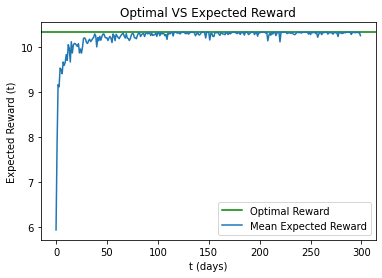

In [33]:
plt.figure(0)
plt.title("Optimal VS Expected Reward")
plt.axhline(opt_reward_TS4, color = 'green')
plt.plot(np.mean(collected_rewards_TS4, axis=0))
plt.xlabel("t (days)")
plt.ylabel("Expected Reward (t)")
plt.legend(["Optimal Reward", "Mean Expected Reward"])
plt.show()

- ### Estimation of Uncertain Parameters

In [34]:
mean_alpha_TS4 = np.mean(np.array(learner_TS4.alpha_ratios_list), axis = 0)
mean_n_prod_TS4 = np.mean(np.array(learner_TS4.n_prod_list), axis = 0)
mean_CR_TS4 = np.mean(learner_TS4.cr_matrix_list, axis = 0)

print('Conversion Rates:\n%s' %mean_CR_TS4)
print('\nAlpha Ratios : %s' % mean_alpha_TS4)
print('\nMean Number of product sold : %s' %mean_n_prod_TS4)

Conversion Rates:
[[0.87125557 0.67255193 0.50097783 0.41021395]
 [0.92254571 0.80128187 0.63874269 0.49729029]
 [0.87335921 0.80818934 0.64732448 0.46850821]
 [0.92299391 0.73911019 0.60837235 0.42852401]
 [0.64253341 0.43287081 0.4408992  0.33853005]]

Alpha Ratios : [0.20043509 0.1999192  0.19875123 0.20051654 0.20042788]

Mean Number of product sold : [2.50457655 2.00275327 1.49814672 1.4987005  1.20086554]


In [35]:
print('THEORETICAL VALUES:\n\nConversion Rates :\n%s' %np.matrix(env.theoretical_values['conversion_rates'][0]))
print('\nAlpha Ratios : %s' %env.alpha_ratios[0] )
print('\nMean Number of product sold : %s' %(env.users[0].poisson_lambda+1))

THEORETICAL VALUES:

Conversion Rates :
[[0.87146285 0.67963081 0.42074029 0.19306234]
 [0.91149201 0.80233746 0.63683065 0.44038231]
 [0.86970548 0.80921305 0.64616977 0.45026178]
 [0.9250663  0.7389137  0.59483487 0.28773972]
 [0.64306616 0.38208858 0.263258   0.09680048]]

Alpha Ratios : [0.2, 0.2, 0.2, 0.2, 0.2]

Mean Number of product sold : [2.5 2.  1.5 1.5 1.2]


## - UCB1

In [98]:
# setting the run parameters
n_runs = 3
daily_users = 200
n_days = 300

In [99]:
opt_reward = env.optimal_reward()[0]
ucb4 = step4_ucb1(len(prices), len(prices[0]), prices, env)
for _ in range(n_runs):
    ucb4.run(n_days, daily_users)

In [100]:
# store the result
with open("ucb4", 'wb') as f1:
    pickle.dump(ucb4, f1)

In [27]:
# load the result
with open("ucb4", 'rb') as f1:
    ucb4 = pickle.load(f1)

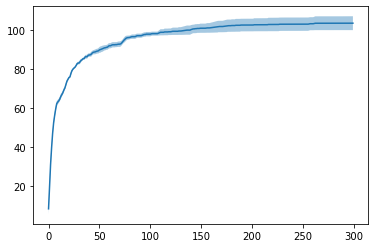

In [28]:
step4_ucb1_collected_rewards = ucb4.collected_rewards
step4_ucb1_R = ucb4.regret
# plot of the result
mean_step4_ucb1_R = np.mean(step4_ucb1_R, axis=0)
std_dev_step4_ucb1 = np.std(step4_ucb1_R, axis=0)/np.sqrt(n_runs)
plt.plot(mean_step4_ucb1_R)
plt.fill_between(range(n_days), mean_step4_ucb1_R-std_dev_step4_ucb1, mean_step4_ucb1_R+std_dev_step4_ucb1, alpha=0.4)

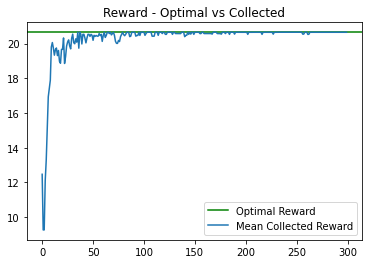

In [29]:
# comparison between optimal and expected reward
plt.figure(0)
plt.title("Reward - Optimal vs Collected")
plt.axhline(opt_reward, color = 'green')
plt.plot(np.mean(step4_ucb1_collected_rewards, axis=0))
plt.legend(["Optimal Reward", "Mean Collected Reward"])
plt.show()

In [30]:
# last n pulled arms
print("Last n pulled arms:")
np.array(ucb4.pulled[-10:-1], dtype=np.int32)[:, 0].tolist()

Last n pulled arms:


[[0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0]]

In [31]:
# ucb1 most pulled arms
combinations_data = [[] for i in range(1024)]
for i1 in range(4):
    for i2 in range(4):
        for i3 in range(4):
            for i4 in range(4):
                for i5 in range(4):
                    combinations_data[i1*(4**4) + i2*(4**3) + i3*(4**2) + i4*(4**1) + i5*(4**0)].append([i1, i2, i3, i4, i5])
                    c = np.array(np.array(ucb4.pulled, dtype=np.int32)[:, 0].tolist()) == [i1, i2, i3, i4, i5]
                    c = np.prod(c, axis=1)
                    combinations_data[i1*(4**4) + i2*(4**3) + i3*(4**2) + i4*(4**1) + i5*(4**0)].append(np.count_nonzero(c))
                    combinations_data[i1*(4**4) + i2*(4**3) + i3*(4**2) + i4*(4**1) + i5*(4**0)].append(env.expected_reward([i1, i2, i3, i4, i5]))
                    x = combinations_data
result = []
for i in range(20):
    result.append(x[np.argmax(np.array(x)[:, 1])])
    x = np.delete(x, np.argmax(np.array(x)[:, 1]), axis=0).tolist()
print("Optimal arms combination:")
print(env.optimal_reward()[1], env.optimal_reward()[0])
print("\n\nUcb1 most pulled arms:")
print("(arms combination), (n° pulls), (exp rew)")
result

C:\Users\stefa\AppData\Local\Temp/ipykernel_20672/1187494405.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result.append(x[np.argmax(np.array(x)[:, 1])])
C:\Users\stefa\AppData\Local\Temp/ipykernel_20672/1187494405.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.delete(x, np.argmax(np.array(x)[:, 1]), axis=0).tolist()
C:\Users\stefa\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differen

Optimal arms combination:
[0, 1, 2, 1, 0] 20.651157065146457


Ucb1 most pulled arms:
(arms combination), (n° pulls), (exp rew)


[[[0, 1, 2, 1, 0], 215, 20.651157065146457],
 [[0, 1, 2, 0, 0], 22, 20.645580219306414],
 [[1, 1, 1, 1, 0], 9, 20.121290049315945],
 [[0, 1, 1, 1, 0], 7, 20.328276656643165],
 [[0, 2, 2, 1, 0], 7, 20.29324032804404],
 [[1, 1, 2, 1, 0], 6, 20.423557603243626],
 [[0, 2, 1, 1, 0], 5, 19.973977869290117],
 [[0, 1, 3, 0, 0], 3, 19.630042194936703],
 [[1, 2, 2, 1, 0], 3, 20.058728768459847],
 [[1, 2, 2, 2, 1], 3, 17.885075308042584],
 [[3, 3, 3, 3, 3], 3, 9.268398595840193],
 [[1, 1, 2, 0, 0], 2, 20.422663368535716],
 [[1, 1, 3, 1, 0], 2, 19.438482687494467],
 [[1, 2, 3, 1, 0], 2, 19.11578103392167],
 [[2, 3, 3, 2, 2], 2, 13.961007048906605],
 [[0, 1, 3, 1, 0], 1, 19.655233906430162],
 [[0, 2, 2, 0, 0], 1, 20.285754860939285],
 [[0, 2, 3, 1, 0], 1, 19.339611234974317],
 [[1, 1, 2, 1, 1], 1, 18.939959005835643],
 [[1, 1, 2, 1, 2], 1, 18.056781246643087]]

In [33]:
ucb4.print_estimations()

Estimated alpha ratios (means + widths, over n experiments):
 [0.21220327 0.21037665 0.21058755 0.21145089 0.21168988] 

Estimated number of products sold (means + widths, over n experiments):
 [2.50516344 2.00769615 1.51131344 1.51030506 1.21219778] 


Conversion rates estimation (means + widths, over n experiments):
 [[0.88527559 0.71358607 0.49999658 0.3199104 ]
 [       inf 0.81191234 0.67501647 0.53242704]
 [       inf 0.84793066 0.6549299  0.51090568]
 [0.9457904  0.75429238 0.66378369 0.40230336]
 [0.65327993 0.47819925 0.38918734 0.24098024]]


# STEP 5 : Uncertain conversion rates and graph weights

## - TS

In [36]:
# Initial assumptions for beta parameters (uniform distr. on [0, 1])
a_cr = np.ones((5,4))*20
b_cr = np.ones((5,4))
initial_beta_CR = np.array([a_cr, b_cr])
a_gw = np.ones((5,2))
b_gw = np.ones((5,2))
initial_beta_gw = np.array([a_gw, b_gw])
learner_TS5 = Step5_TS(env, initial_beta_CR, initial_beta_gw, learning_rate=1.0)

In [37]:
# set the parameter for the algorithm execution
n_runs = 1
daily_users = 200
n_days = 300

# delete possible old informations form past runs 
learner_TS5.reward_history = []
learner_TS5.price_comb_history = []
learner_TS5.cr_matrix_list = []
learner_TS5.graph_weights_list = []

# execute the algorithm n_runs times
for i in range(n_runs) :
    learner_TS5.run(n_days, daily_users)

# collect all informations for the plot
opt_reward_TS5 = learner_TS5.opt_reward
collected_rewards_TS5 = learner_TS5.reward_history

- ### Salvo la history su file in modo che siamo sicuri ti riuscire a recuperarla anche in un secondo momento

In [24]:
with open('step5_TS_rewards', 'wb') as f: 
    pickle.dump(collected_rewards_TS5, f)

- ### Per recuperare, invece, i risultati ottenuti in un secondo momento :

In [ ]:
with open('step5_TS_rewards', 'rb') as f: 
    collected_rewards_TS5 = pickle.load(f)

- ### Cumulative Regret Plot

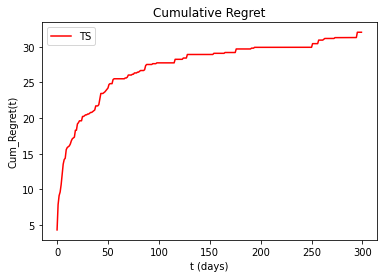

In [38]:
plt.figure(0)
plt.xlabel("t (days)")
plt.ylabel("Cum_Regret(t)")
plt.title("Cumulative Regret")
plt.plot(np.cumsum(np.mean(opt_reward_TS5 - collected_rewards_TS5, axis=0)), 'r')  #'r' stay for red, the color for the TS algorithm
plt.legend(["TS"])
plt.show()

- ### Standard Deviation Plot

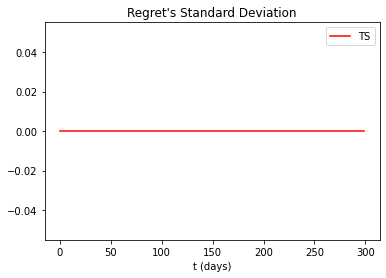

In [39]:
plt.figure(0)
plt.xlabel("t (days)")
plt.title("Regret's Standard Deviation")
plt.plot(np.std(opt_reward_TS5 - collected_rewards_TS5, axis=0), 'r')  #'r' stay for red, the color for the TS algorithm
#plt.plot(np.std(opt - gr_rewards_per_experiment, axis=0), 'g')  #'g' stay for green, the color for the Greedy algorithm
plt.legend(["TS"])
plt.show()

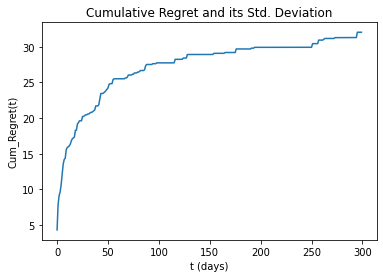

In [40]:
# mean_R = np.mean(R, axis=0)
cum_R_TS5 = np.cumsum(opt_reward_TS5 - collected_rewards_TS5, axis = 1)
mean_cum_R_TS5 = np.mean(cum_R_TS5, axis = 0)
std_dev_TS5 = np.std(cum_R_TS5, axis=0)/np.sqrt(n_runs)
plt.plot(mean_cum_R_TS5)
plt.fill_between(range(n_days), mean_cum_R_TS5-std_dev_TS5, mean_cum_R_TS5+std_dev_TS5, alpha=0.4)
plt.title("Cumulative Regret and its Std. Deviation")
plt.xlabel("t (days)")
plt.ylabel("Cum_Regret(t)")
plt.show()

- ### Comparison between Optimal and Expected Reward

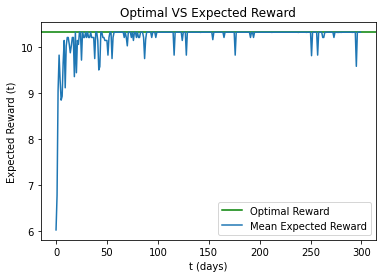

In [41]:
plt.figure(0)
plt.title("Optimal VS Expected Reward")
plt.axhline(opt_reward_TS5, color = 'green')
plt.plot(np.mean(collected_rewards_TS5, axis=0))
plt.xlabel("t (days)")
plt.ylabel("Expected Reward (t)")
plt.legend(["Optimal Reward", "Mean Expected Reward"])
plt.show()

- ### Estimation of Uncertain Parameters

In [42]:
mean_CR_TS5 = np.mean(learner_TS5.cr_matrix_list, axis = 0)
mean_GW_TS5 = np.mean(learner_TS5.graph_weights_list, axis = 0)

print('Conversion Rates:\n%s' %mean_CR_TS5)
print('\nGraph Weights : %s' %mean_GW_TS5)

Conversion Rates:
[[0.8743596  0.69209809 0.48529412 0.36190476]
 [0.87777778 0.80453573 0.63797814 0.48333333]
 [0.87692308 0.79005525 0.64780392 0.46761985]
 [0.91134021 0.74213661 0.58454106 0.46666667]
 [0.64984902 0.43881857 0.45945946 0.35384615]]

Graph Weights : [[0.         0.59978265 0.13571149 0.         0.        ]
 [0.49932723 0.         0.27688853 0.         0.        ]
 [0.         0.49758    0.         0.35126508 0.        ]
 [0.         0.         0.60545645 0.         0.3492641 ]
 [0.         0.         0.30199531 0.33821274 0.        ]]


In [43]:
print('THEORETICAL VALUES:\n\nConversion Rates :\n%s' %np.matrix(env.theoretical_values['conversion_rates'][0]))
print('\nGraph Weights :\n%s' %env.users[0].probabilities )

THEORETICAL VALUES:

Conversion Rates :
[[0.87146285 0.67963081 0.42074029 0.19306234]
 [0.91149201 0.80233746 0.63683065 0.44038231]
 [0.86970548 0.80921305 0.64616977 0.45026178]
 [0.9250663  0.7389137  0.59483487 0.28773972]
 [0.64306616 0.38208858 0.263258   0.09680048]]

Graph Weights :
[[0.   0.6  0.14 0.   0.  ]
 [0.5  0.   0.28 0.   0.  ]
 [0.   0.5  0.   0.35 0.  ]
 [0.   0.   0.6  0.   0.35]
 [0.   0.   0.3  0.35 0.  ]]


## - UCB1

In [108]:
# setting the run parameters
n_runs = 3
daily_users = 200
n_days = 300

In [109]:
opt_reward = env.optimal_reward()[0]
ucb5 = step5_ucb1(len(prices), len(prices[0]), prices, env)
for _ in range(n_runs):
    ucb5.run(n_days, daily_users)

In [110]:
# store the result
with open("ucb5", 'wb') as f1:
    pickle.dump(ucb5, f1)

In [34]:
# load the result
with open("ucb5", 'rb') as f1:
    ucb5 = pickle.load(f1)

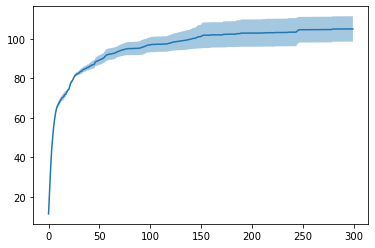

In [35]:
step5_ucb1_collected_rewards = ucb5.collected_rewards
step5_ucb1_R = ucb5.regret
# plot of the result
mean_step5_ucb1_R = np.mean(step5_ucb1_R, axis=0)
std_dev_step5_ucb1 = np.std(step5_ucb1_R, axis=0)/np.sqrt(n_runs)
plt.plot(mean_step5_ucb1_R)
plt.fill_between(range(n_days), mean_step5_ucb1_R-std_dev_step5_ucb1, mean_step5_ucb1_R+std_dev_step5_ucb1, alpha=0.4)
plt.show()

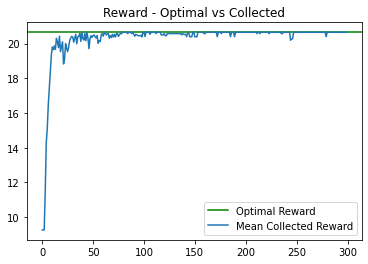

In [36]:
# comparison between optimal and expected reward
plt.figure(0)
plt.title("Reward - Optimal vs Collected")
plt.axhline(opt_reward, color = 'green')
plt.plot(np.mean(step5_ucb1_collected_rewards, axis=0))
plt.legend(["Optimal Reward", "Mean Collected Reward"])
plt.show()

In [37]:
# last n pulled arms
print("Last n pulled arms:")
np.array(ucb5.pulled[-10:-1], dtype=np.int32)[:, 0].tolist()

Last n pulled arms:


[[0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0],
 [0, 1, 2, 1, 0]]

In [38]:
# ucb1 most pulled arms
combinations_data = [[] for i in range(1024)]
for i1 in range(4):
    for i2 in range(4):
        for i3 in range(4):
            for i4 in range(4):
                for i5 in range(4):
                    combinations_data[i1*(4**4) + i2*(4**3) + i3*(4**2) + i4*(4**1) + i5*(4**0)].append([i1, i2, i3, i4, i5])
                    c = np.array(np.array(ucb5.pulled, dtype=np.int32)[:, 0].tolist()) == [i1, i2, i3, i4, i5]
                    c = np.prod(c, axis=1)
                    combinations_data[i1*(4**4) + i2*(4**3) + i3*(4**2) + i4*(4**1) + i5*(4**0)].append(np.count_nonzero(c))
                    combinations_data[i1*(4**4) + i2*(4**3) + i3*(4**2) + i4*(4**1) + i5*(4**0)].append(env.expected_reward([i1, i2, i3, i4, i5]))
                    x = combinations_data
result = []
for i in range(20):
    result.append(x[np.argmax(np.array(x)[:, 1])])
    x = np.delete(x, np.argmax(np.array(x)[:, 1]), axis=0).tolist()
print("Optimal arms combination:")
print(env.optimal_reward()[1], env.optimal_reward()[0])
print("\n\nUcb1 most pulled arms:")
print("(arms combination), (n° pulls), (exp rew)")
result

C:\Users\stefa\AppData\Local\Temp/ipykernel_20672/1309711750.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result.append(x[np.argmax(np.array(x)[:, 1])])
C:\Users\stefa\AppData\Local\Temp/ipykernel_20672/1309711750.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.delete(x, np.argmax(np.array(x)[:, 1]), axis=0).tolist()
C:\Users\stefa\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differen

Optimal arms combination:
[0, 1, 2, 1, 0] 20.651157065146457


Ucb1 most pulled arms:
(arms combination), (n° pulls), (exp rew)


[[[0, 1, 2, 1, 0], 181, 20.651157065146457],
 [[0, 1, 2, 0, 0], 55, 20.645580219306414],
 [[1, 1, 1, 1, 0], 9, 20.121290049315945],
 [[0, 2, 2, 0, 0], 8, 20.285754860939285],
 [[1, 1, 2, 1, 0], 8, 20.423557603243626],
 [[1, 1, 2, 0, 0], 7, 20.422663368535716],
 [[0, 2, 1, 1, 0], 5, 19.973977869290117],
 [[3, 3, 3, 3, 3], 3, 9.268398595840193],
 [[0, 1, 1, 1, 0], 2, 20.328276656643165],
 [[0, 1, 3, 1, 0], 2, 19.655233906430162],
 [[0, 2, 2, 1, 0], 2, 20.29324032804404],
 [[1, 2, 2, 1, 0], 2, 20.058728768459847],
 [[2, 2, 2, 2, 1], 2, 16.459104409832374],
 [[0, 1, 2, 2, 0], 1, 19.857444463289553],
 [[0, 1, 3, 0, 0], 1, 19.630042194936703],
 [[0, 2, 1, 2, 0], 1, 19.188174959773427],
 [[1, 0, 2, 1, 0], 1, 19.886533251468244],
 [[1, 1, 1, 0, 0], 1, 20.067871467732616],
 [[1, 1, 1, 1, 1], 1, 18.642955872309194],
 [[1, 1, 3, 1, 0], 1, 19.438482687494467]]

In [39]:
ucb5.print_estimations()

Estimated graph weights (means + widths, over n experiment, lambda included):
 [[       inf 0.60853813 0.14132678        inf        inf]
 [0.50156235        inf 0.2832187         inf        inf]
 [       inf 0.50471899        inf 0.34860795        inf]
 [       inf        inf 0.6013234         inf 0.35162423]
 [       inf        inf 0.30839183 0.35329561        inf]] 


Conversion rates estimation (means + widths, over n experiments):
 [[0.88419846 0.7152056  0.50519416 0.29375341]
 [       inf 0.81217637 0.67063875 0.51339902]
 [       inf 0.84747936 0.65797164 0.50901356]
 [0.94276108 0.75280202 0.65732886 0.40348443]
 [0.65617321 0.47710691 0.37635509 0.26845831]]


# STEP 6 : Abrupt Changes in Demand Curve with Uncertain Conversion Rates and Graph Weights

In [50]:
from step6_sw_ucb import *

In [59]:
#########################
# ABRUPT CHANGE SETTING #
#########################
n_runs = 1
daily_users = 200
n_days = 600

changes_dict ={
    #0 : {"mean": [9.7, 12.7, 24.5, 31.6, 41.1],"std": [1.5, 2, 4, 2.5, 3]},
    200 : {"mean": [9.0, 11.3, 23.2, 30.1, 39.7], "std": [1.3, 1.7, 3.5, 2.1, 2.7]},
    400 : {"mean": [10.5, 14.0, 25.8, 32.0, 43.0], "std": [1.7, 2.2, 4.3, 2.9, 3.2]},
    #225 : {"mean": [9.7, 12.7, 24.5, 31.6, 41.1], "std": [1.5, 2, 4, 2.5, 3]}
}
opt_reward = env.optimal_reward()[0]
opt_reward_evolution = np.zeros(n_days)
original_res_price_param = copy.deepcopy(env.users[0].res_price_params)
for t in range(n_days):
    if t in changes_dict.keys(): 
        env.abrupt_change_deterministic([changes_dict[t]])
        opt_reward = env.optimal_reward()[0]
    opt_reward_evolution[t] = opt_reward

env.abrupt_change_deterministic([original_res_price_param])

- ### sw_ucb

In [60]:
4*np.sqrt(n_days)

97.97958971132712

In [61]:
sw = 100
sw_ucb = step6_sw_ucb(len(prices), len(prices[0]), prices, env, changes_dict, sw)
for _ in range(n_runs):
    sw_ucb.run(n_days, daily_users)

In [60]:
# store the result
with open("sw_ucb", 'wb') as f1:
    pickle.dump(sw_ucb, f1)

In [41]:
# load the result
with open("sw_ucb", 'rb') as f1:
    sw_ucb = pickle.load(f1)

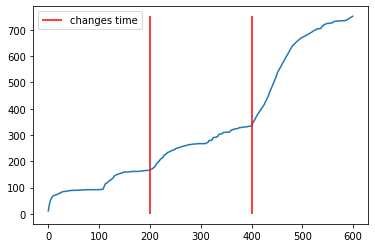

In [62]:
sw_ucb_collected_rewards = sw_ucb.collected_rewards
sw_ucb_R = sw_ucb.regret
# plot of the result
mean_sw_ucb_R = np.mean(sw_ucb_R, axis=0)
std_sw_ucb = np.std(sw_ucb_R, axis=0)/np.sqrt(n_runs)
plt.plot(mean_sw_ucb_R)
plt.fill_between(range(n_days), mean_sw_ucb_R-std_sw_ucb, mean_sw_ucb_R+std_sw_ucb, alpha=0.4)
changes_time = list(changes_dict.keys())
changes_n = len(changes_time)
plt.vlines(changes_time, [0]*changes_n, [max(mean_sw_ucb_R)]*changes_n, color = 'red', label= 'changes time')
plt.legend()
plt.show()

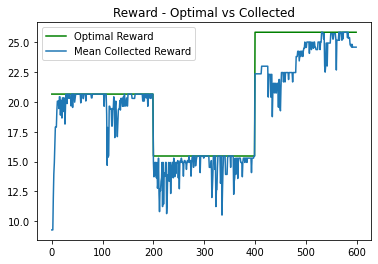

In [63]:
# comparison between optimal and expected reward
plt.figure(0)
plt.title("Reward - Optimal vs Collected")
plt.plot(opt_reward_evolution, color = 'green')
plt.plot(np.mean(sw_ucb_collected_rewards, axis=0))
plt.legend(["Optimal Reward", "Mean Collected Reward"])
plt.show()

## - Sliding Window TS

In [44]:
# set the parameter for the algorithm execution
n_runs = 100
daily_users = 200
n_days = 300

changes_dict ={
    #0 : {"mean": [9.7, 12.7, 24.5, 31.6, 41.1],"std": [1.5, 2, 4, 2.5, 3]},
    100 : {"mean": [9.0, 11.3, 23.2, 30.1, 39.7], "std": [1.3, 1.7, 3.5, 2.1, 2.7]},
    200 : {"mean": [10.5, 14.0, 25.8, 32.0, 43.0], "std": [1.7, 2.2, 4.3, 2.9, 3.2]}
    #225 : {"mean": [9.7, 12.7, 24.5, 31.6, 41.1], "std": [1.5, 2, 4, 2.5, 3]}
}
changes_time = list(changes_dict.keys())
changes_n = len(changes_time)

opt_reward = env.optimal_reward()[0]
opt_reward_evolution = np.zeros(n_days)
original_res_price_param = copy.deepcopy(env.users[0].res_price_params)
for t in range(n_days):
    if t in changes_dict.keys(): 
        env.abrupt_change_deterministic([changes_dict[t]])
        opt_reward = env.optimal_reward()[0]
    opt_reward_evolution[t] = opt_reward

env.abrupt_change_deterministic([original_res_price_param])

In [45]:
# Initial assumptions for beta parameters (uniform distr. on [0, 1])
# CONVERSION RATES INITIAL VALUES
a_cr = np.ones((5,4))*40
b_cr = np.ones((5,4))
initial_beta_CR = np.array([a_cr, b_cr])
# GRAPH WEIGHTS INITIAL VALUES
a_gw = np.ones((5,2))
b_gw = np.ones((5,2))
initial_beta_gw = np.array([a_gw, b_gw])
# SLIDING WINDOW WIDTH
sw = 100
# Learner initializer
learner_TS6 = Step6_TS_sw(env, initial_beta_CR, initial_beta_gw, sw, changes_dict)

In [46]:
# delete possible old informations form past runs 
learner_TS6.reward_history = []
learner_TS6.price_comb_history = []
learner_TS6.cr_matrix_list = []
learner_TS6.graph_weights_list = []
learner_TS6.CR_data_history = []

# execute the algorithm n_runs times
for i in range(n_runs) :
    learner_TS6.run(n_days, daily_users)

# collect all informations for the plot
opt_reward_TS6 = learner_TS6.opt_reward
collected_rewards_TS6 = learner_TS6.reward_history

- ### Salvo la history su file in modo che siamo sicuri ti riuscire a recuperarla anche in un secondo momento

In [19]:
with open('step6_TS_rewards', 'wb') as f: 
    pickle.dump(collected_rewards_TS6, f)

- ### Per recuperare, invece, i risultati ottenuti in un secondo momento :

In [ ]:
with open('step6_TS_rewards', 'rb') as f: 
    collected_rewards_TS6 = pickle.load(f)

- ### Cumulative Regret Plot

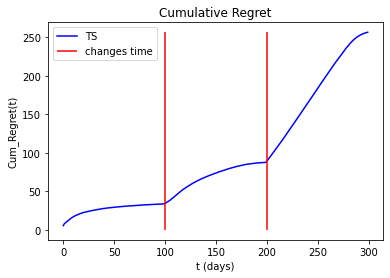

In [47]:
plt.figure(0)
plt.xlabel("t (days)")
plt.ylabel("Cum_Regret(t)")
plt.title("Cumulative Regret")
cum_regret = np.cumsum(np.mean(opt_reward_evolution - collected_rewards_TS6, axis=0))
plt.plot(cum_regret, 'blue', label = 'TS')  #'r' stay for red, the color for the TS algorithm
plt.vlines(changes_time, [0]*changes_n, [max(cum_regret)]*changes_n, color = 'red', label= 'changes time')
plt.legend()
plt.show()

- ### Standard Deviation Plot

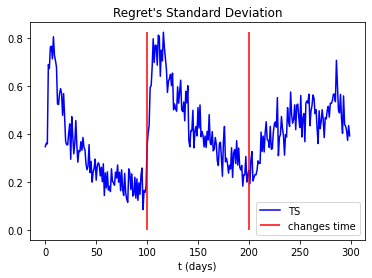

In [48]:
plt.figure(0)
plt.xlabel("t (days)")
plt.title("Regret's Standard Deviation")
std_regret = np.std(opt_reward_evolution - collected_rewards_TS6, axis=0)
plt.plot(std_regret, 'blue', label = 'TS')  #'r' stay for red, the color for the TS algorithm
plt.vlines(changes_time, [0]*changes_n, [max(std_regret)]*changes_n, color = 'red', label= 'changes time')
plt.legend()
plt.show()

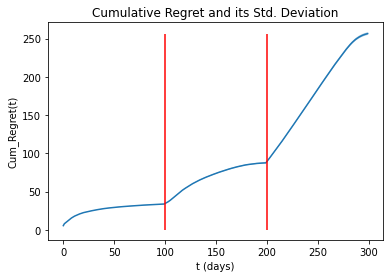

In [49]:
# mean_R = np.mean(R, axis=0)
cum_R_TS6 = np.cumsum(opt_reward_evolution - collected_rewards_TS6, axis = 1)
mean_cum_R_TS6 = np.mean(cum_R_TS6, axis = 0)
std_dev_TS6 = np.std(cum_R_TS6, axis=0)/np.sqrt(n_runs)
plt.plot(mean_cum_R_TS6)
plt.fill_between(range(n_days), mean_cum_R_TS6-std_dev_TS6, mean_cum_R_TS6+std_dev_TS6, alpha=0.4)
plt.vlines(changes_time, [0]*changes_n, [max(mean_cum_R_TS6)]*changes_n, color = 'red', label= 'changes time')
plt.title("Cumulative Regret and its Std. Deviation")
plt.xlabel("t (days)")
plt.ylabel("Cum_Regret(t)")
plt.legend
plt.show()

- ### Comparison between Optimal and Expected Reward

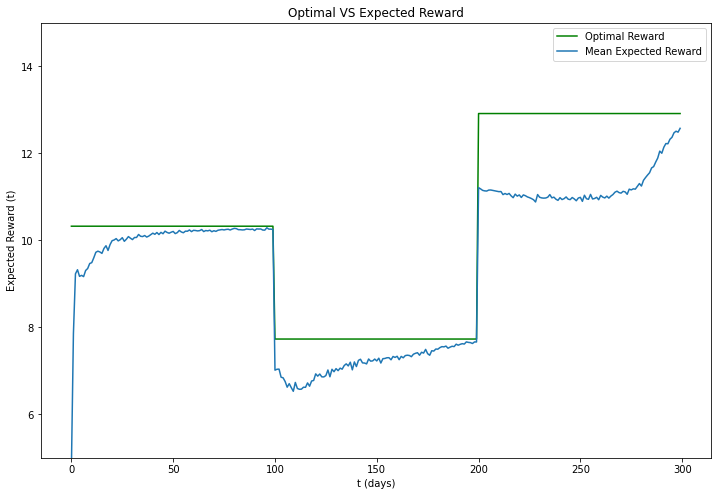

In [57]:
plt.figure(figsize=(12,8))
plt.title("Optimal VS Expected Reward")
plt.plot(opt_reward_evolution, color = 'green', label = "Optimal Reward")
plt.plot(np.mean(collected_rewards_TS6, axis=0), label = "Mean Expected Reward")
plt.xlabel("t (days)")
plt.ylabel("Expected Reward (t)")
plt.ylim([5, 15])
plt.legend()
plt.show()

# STEP 7 : Context generation algorithms

In [58]:
# Initial assumptions for beta parameters (uniform distr. on [0, 1])
a = np.ones((5,4))*40
b = np.ones((5,4))
initial_beta_CR = np.array([a, b])
initial_beta_alpha = np.ones((2,5))
initial_n_prod_data = np.ones((2,5))
learner_TS7 = Step7_TS(env3, initial_beta_CR, initial_beta_alpha, initial_n_prod_data)

In [59]:
# set the parameter for the algorithm execution
n_runs = 20
daily_users = 200
n_days = 300

# delete possible old informations form past runs 
learner_TS7.reward_history = []
learner_TS7.context_history = []

# execute the algorithm n_runs times
for i in range(n_runs) :
    learner_TS7.run(n_days, daily_users)

# collect all informations for the plot
opt_reward_TS7 = learner_TS7.opt_reward
collected_rewards_TS7 = learner_TS7.reward_history

- ### Cumulative Regret Plot

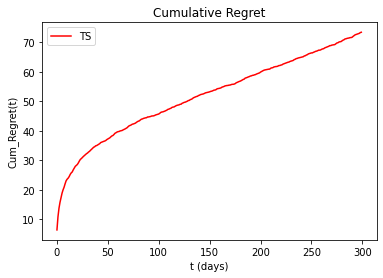

In [60]:
plt.figure(0)
plt.xlabel("t (days)")
plt.ylabel("Cum_Regret(t)")
plt.title("Cumulative Regret")
plt.plot(np.cumsum(np.mean(opt_reward_TS7 - collected_rewards_TS7, axis=0)), 'r')  #'r' stay for red, the color for the TS algorithm
plt.legend(["TS"])
plt.show()

- ### Standard Deviation Plot

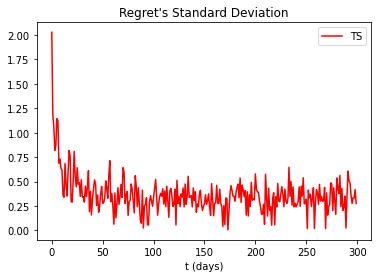

In [61]:
plt.figure(0)
plt.xlabel("t (days)")
plt.title("Regret's Standard Deviation")
plt.plot(np.std(opt_reward_TS7 - collected_rewards_TS7, axis=0), 'r')  #'r' stay for red, the color for the TS algorithm
#plt.plot(np.std(opt - gr_rewards_per_experiment, axis=0), 'g')  #'g' stay for green, the color for the Greedy algorithm
plt.legend(["TS"])
plt.show()

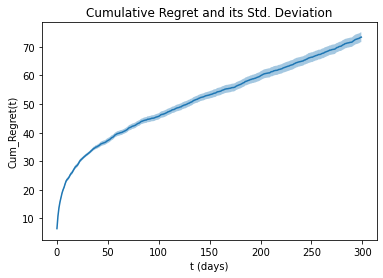

In [66]:
# mean_R = np.mean(R, axis=0)
cum_R_TS7 = np.cumsum(opt_reward_TS7 - collected_rewards_TS7, axis = 1)
mean_cum_R_TS7 = np.mean(cum_R_TS7, axis = 0)
std_dev_TS7 = np.std(cum_R_TS7, axis=0)/np.sqrt(n_runs)
plt.plot(mean_cum_R_TS7)
plt.fill_between(range(n_days), mean_cum_R_TS7-std_dev_TS7, mean_cum_R_TS7+std_dev_TS7, alpha=0.4)
plt.title("Cumulative Regret and its Std. Deviation")
plt.xlabel("t (days)")
plt.ylabel("Cum_Regret(t)")
plt.show()

- ### Comparison between Optimal and Expected Reward

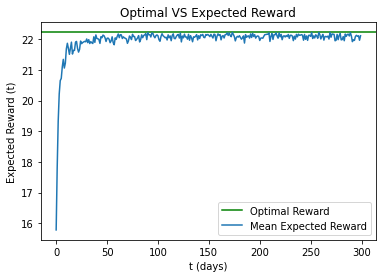

In [65]:
plt.figure(0)
plt.title("Optimal VS Expected Reward")
plt.axhline(opt_reward_TS7, color = 'green')
plt.plot(np.mean(collected_rewards_TS7, axis=0))
plt.xlabel("t (days)")
plt.ylabel("Expected Reward (t)")
plt.legend(["Optimal Reward", "Mean Expected Reward"])
plt.show()